<a href="https://colab.research.google.com/github/Kinnaruo/MachineLearning/blob/main/Week%204/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load Data
import pandas as pd

train_url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/train.csv"
test_url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/test.csv"

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

# Cek info awal
print(train_df.info())
print(train_df.describe())

# Cek missing values
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

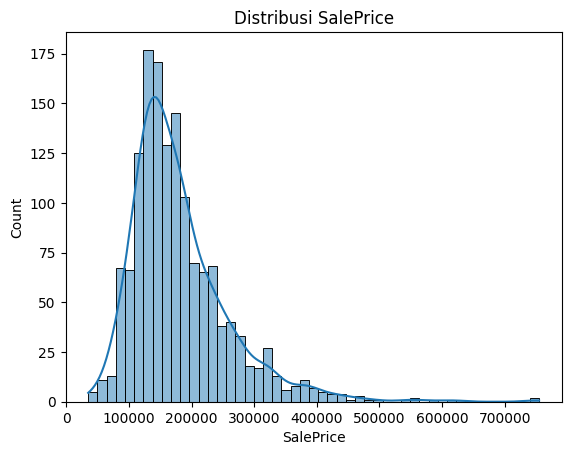

In [ ]:
# Visualisasi target
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribusi SalePrice')
plt.show()

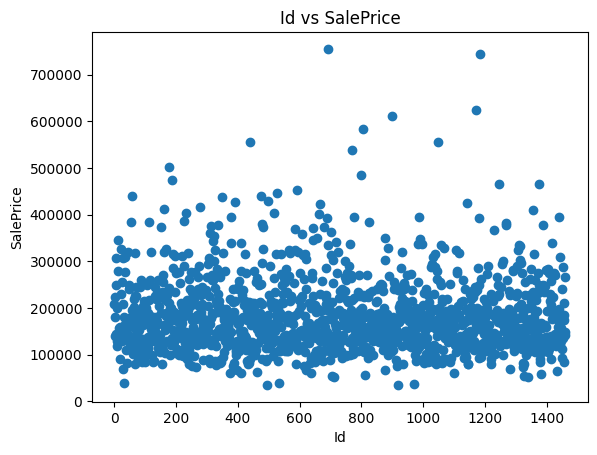

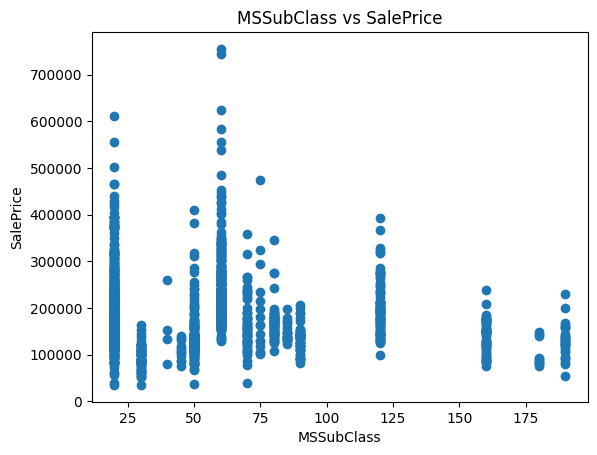

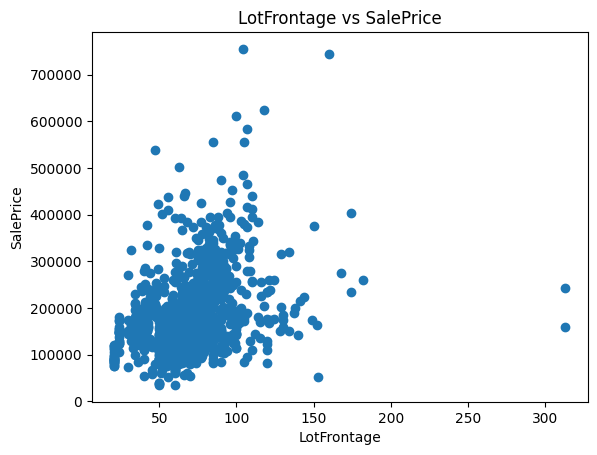

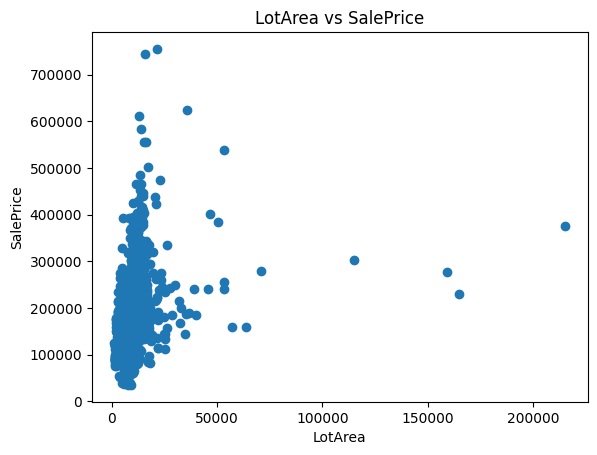

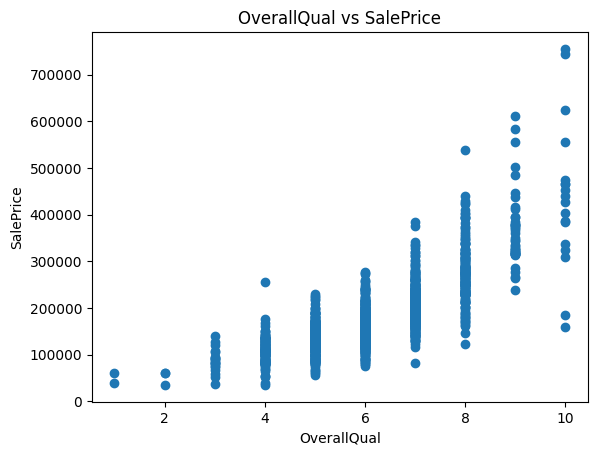

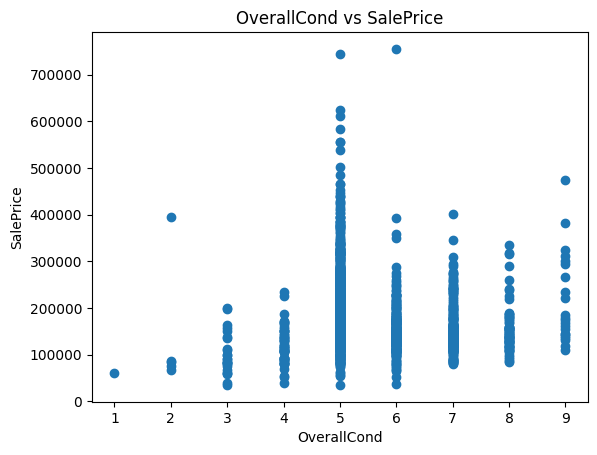

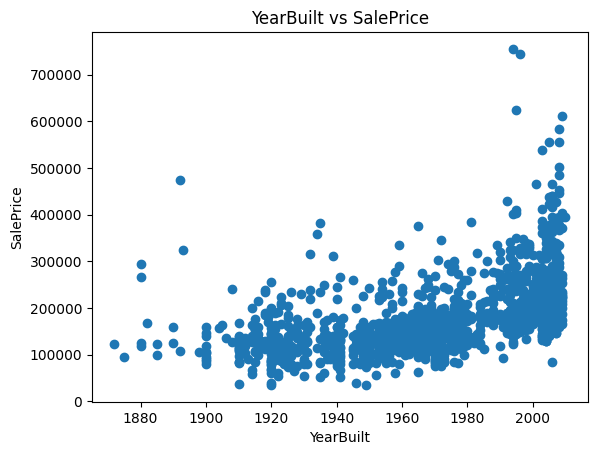

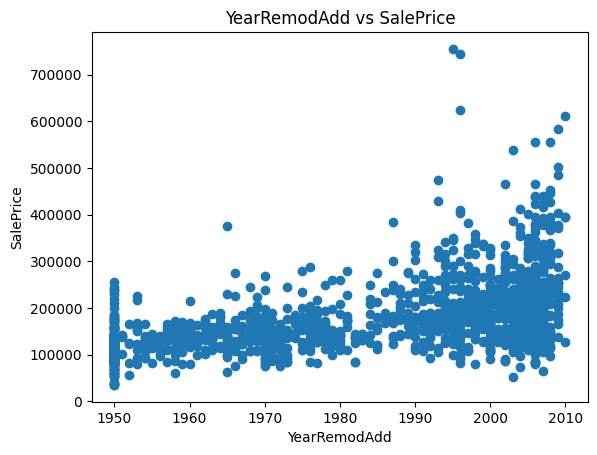

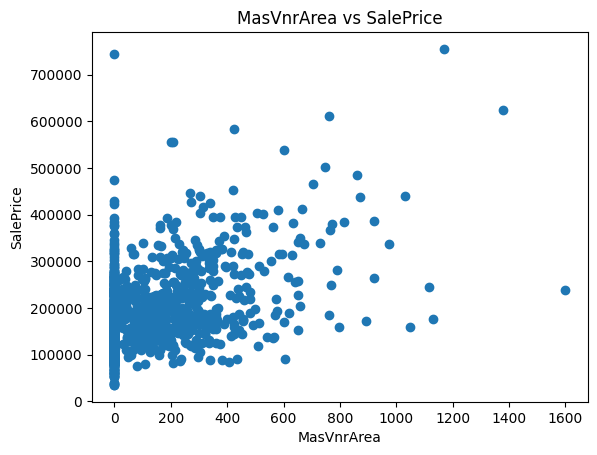

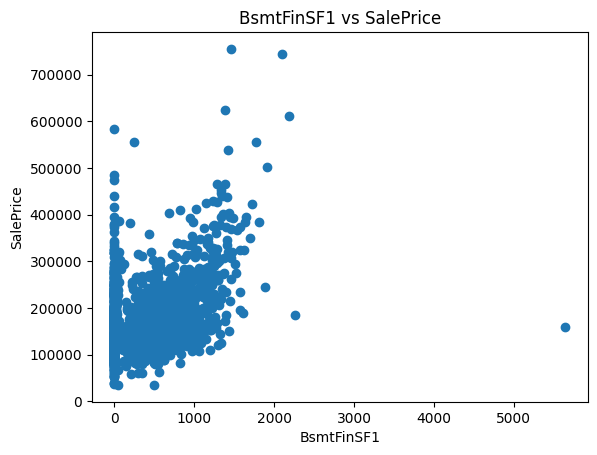

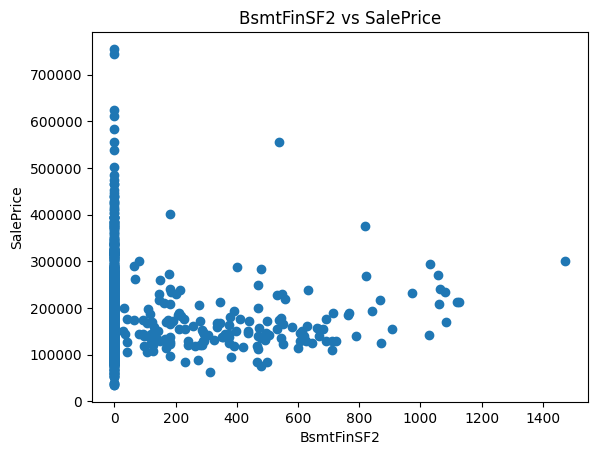

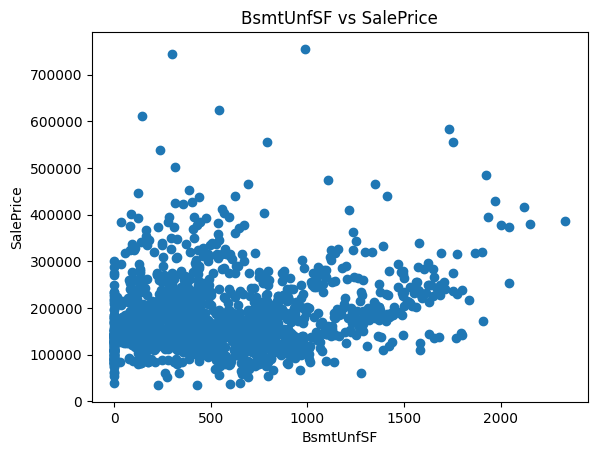

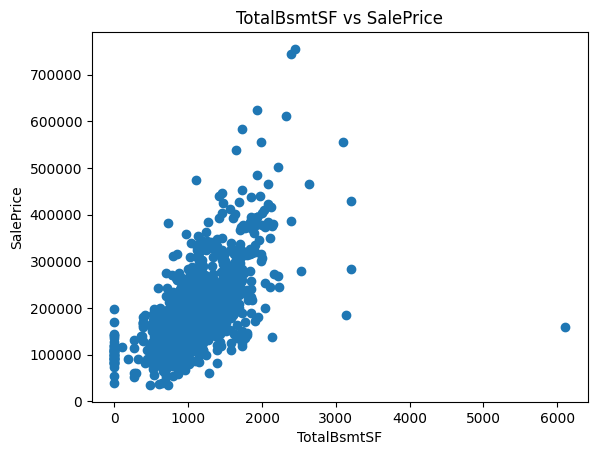

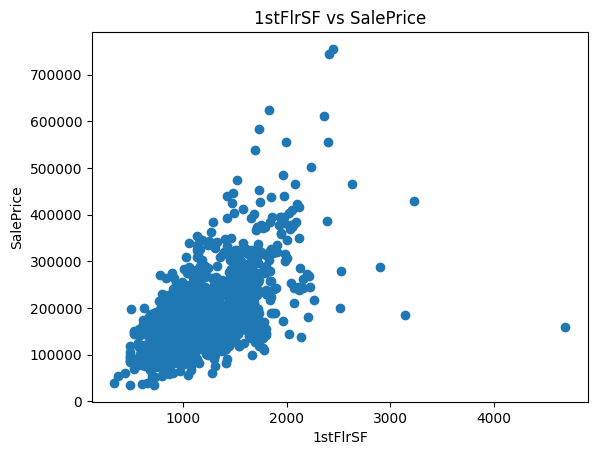

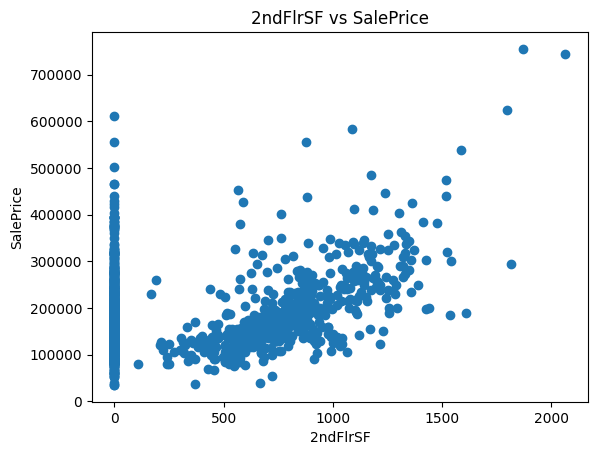

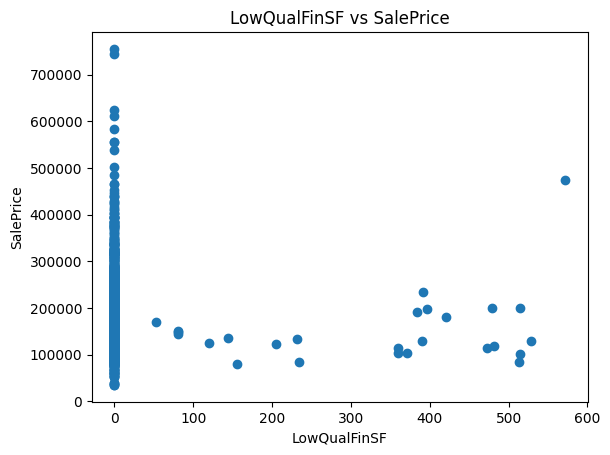

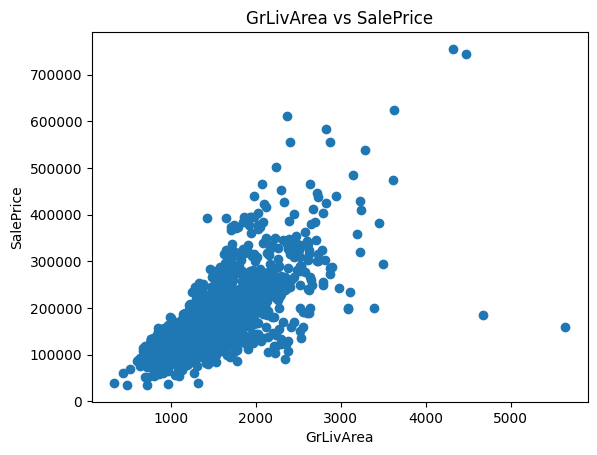

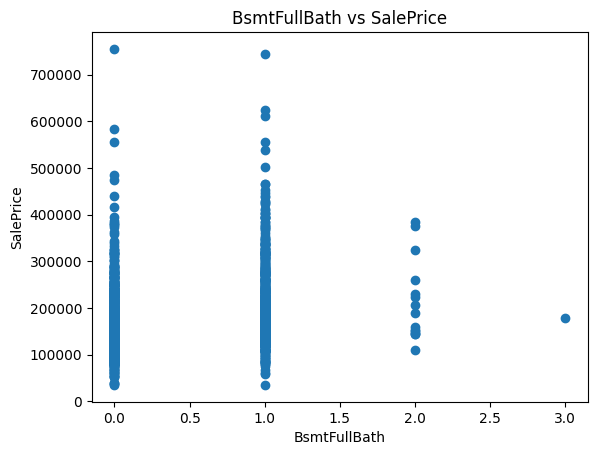

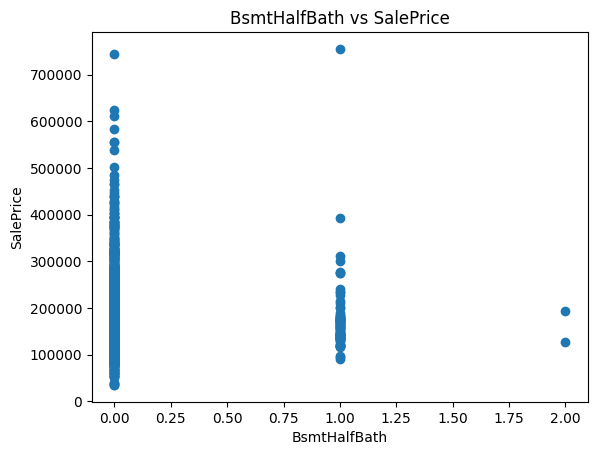

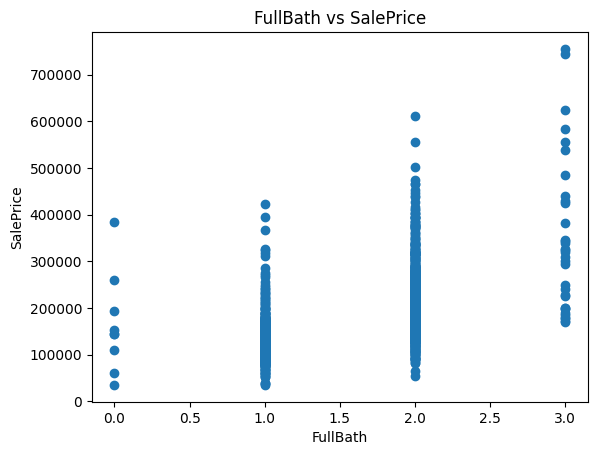

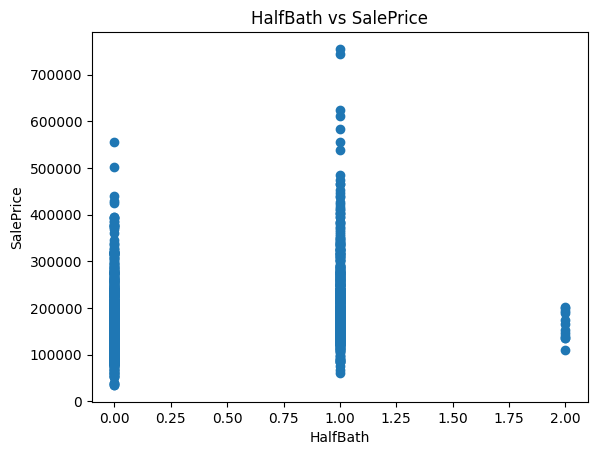

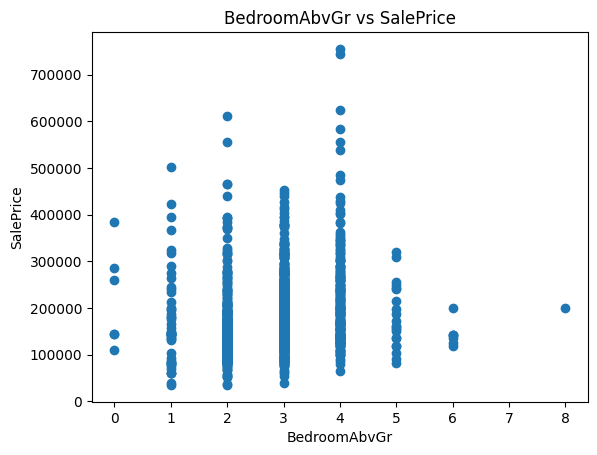

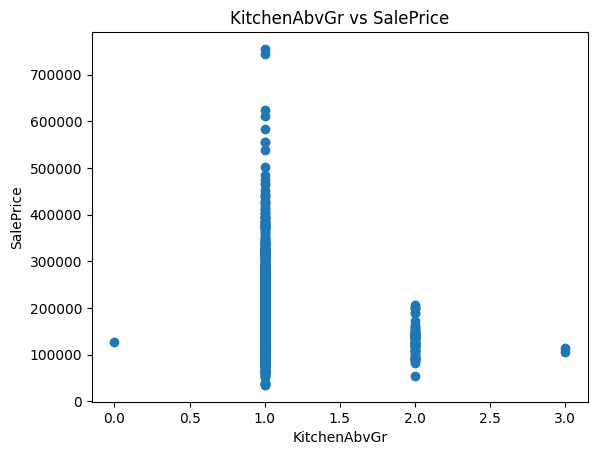

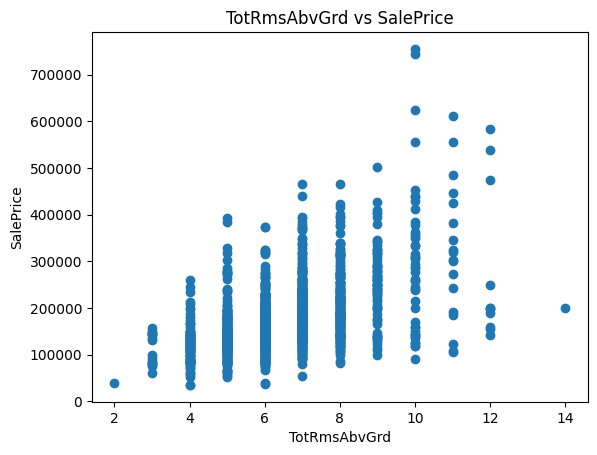

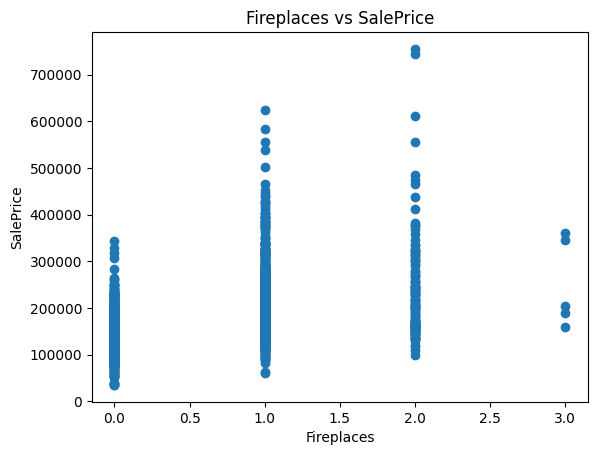

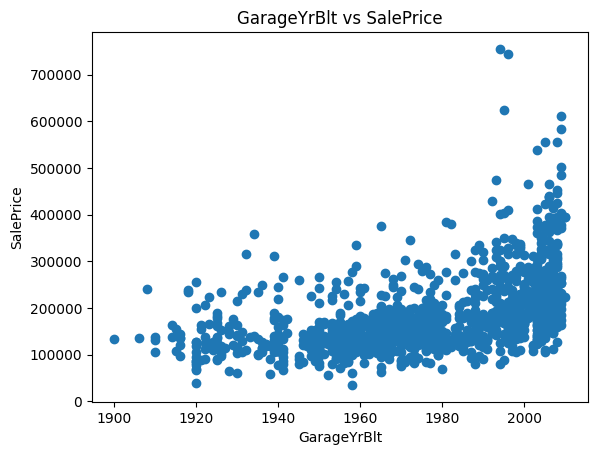

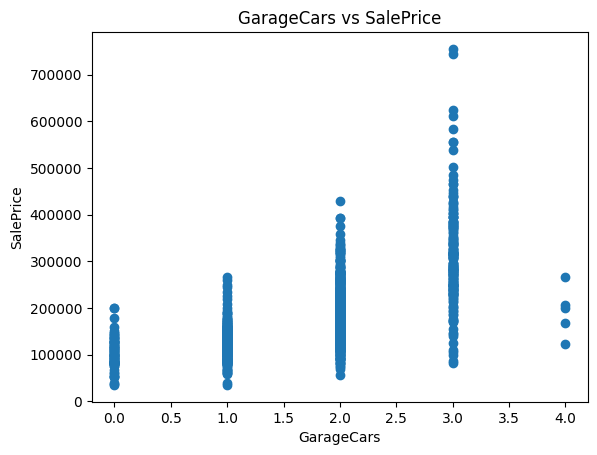

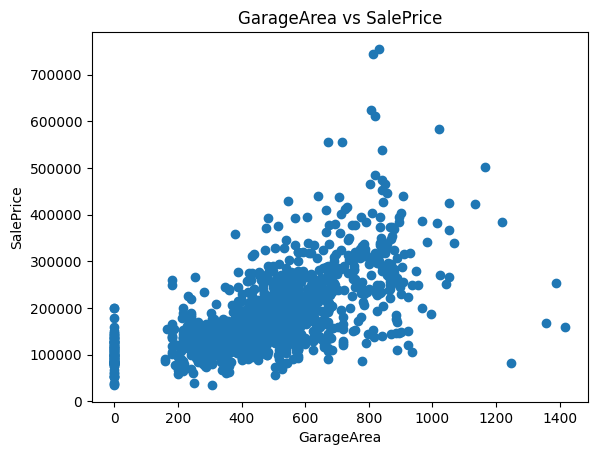

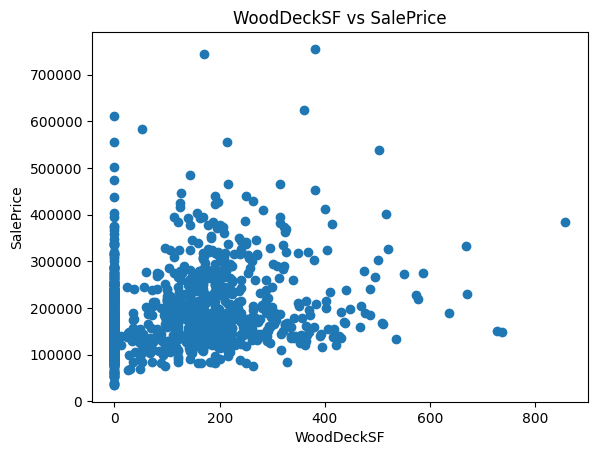

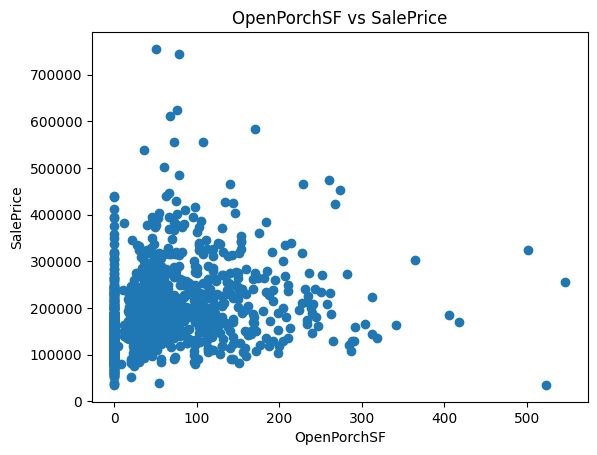

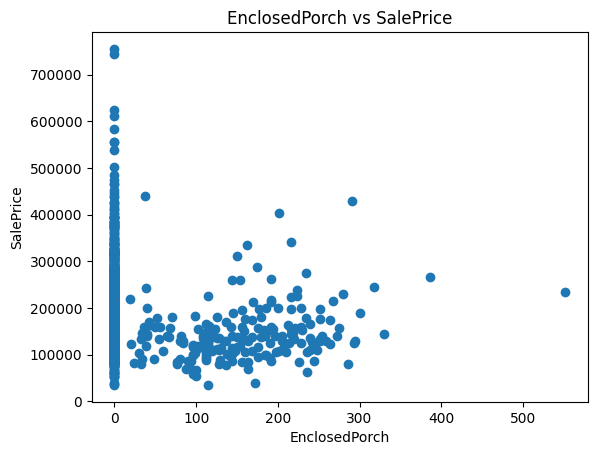

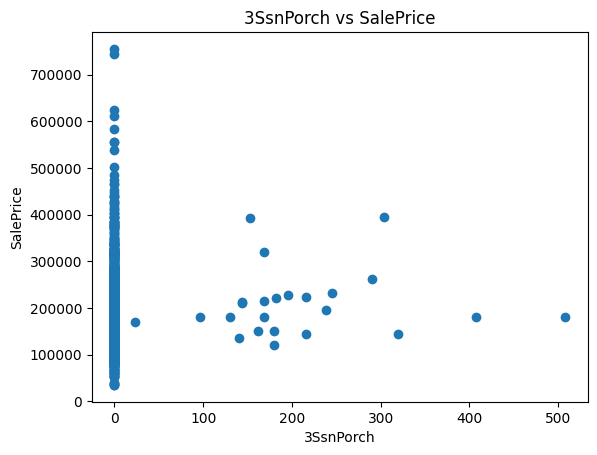

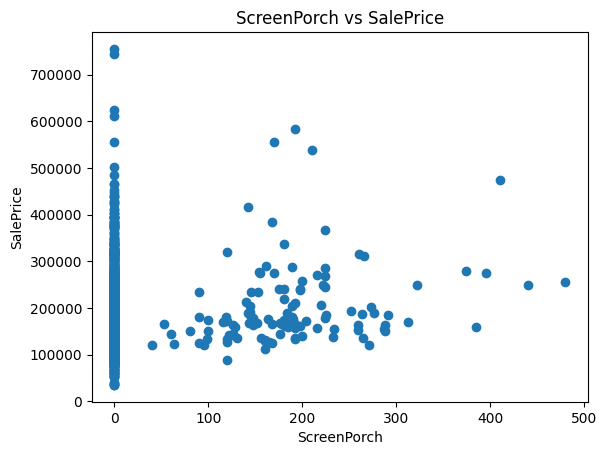

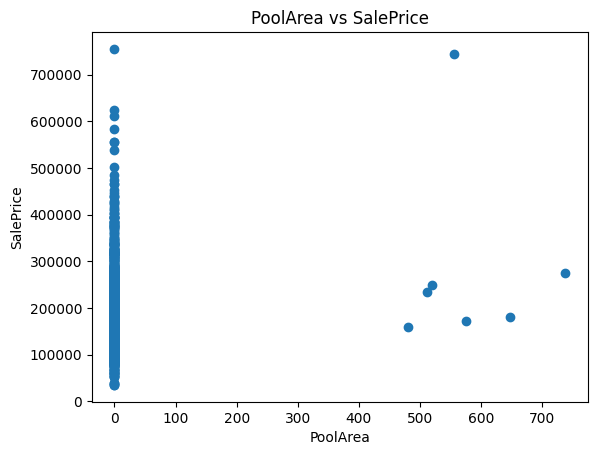

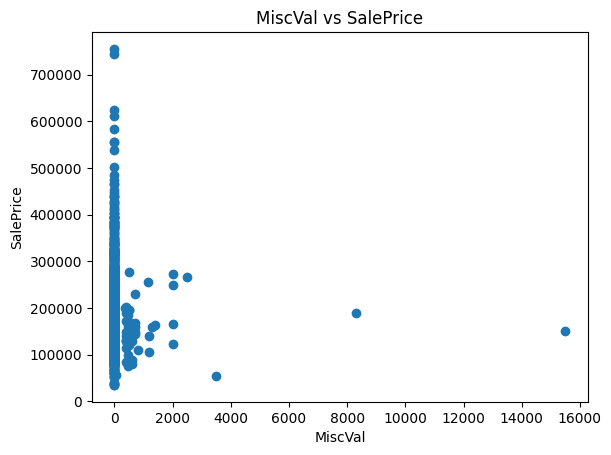

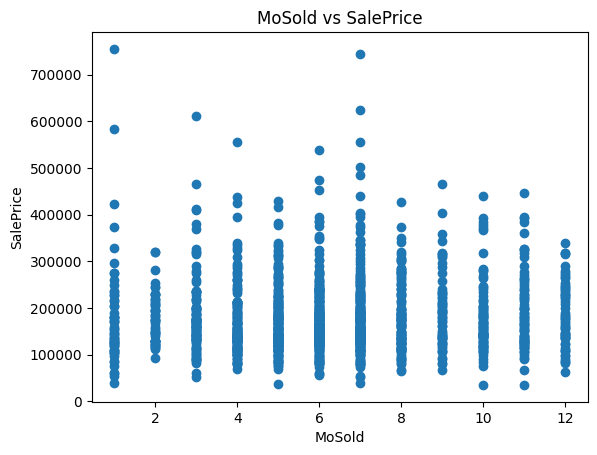

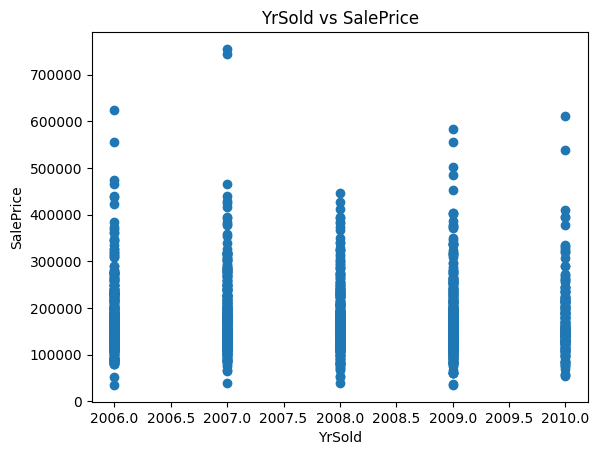

In [ ]:
# Visualisasi feature numerik vs SalePrice
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if col != 'SalePrice':
        plt.scatter(train_df[col], train_df['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.title(f'{col} vs SalePrice')
        plt.show()

In [ ]:
# Mengisi missing values
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

test_num_cols = [col for col in num_cols if col in test_df.columns]
test_cat_cols = [col for col in cat_cols if col in test_df.columns]

train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
test_df[test_num_cols] = test_df[test_num_cols].fillna(test_df[test_num_cols].median())

train_df[cat_cols] = train_df[cat_cols].fillna(train_df[cat_cols].mode().iloc[0])
test_df[test_cat_cols] = test_df[test_cat_cols].fillna(test_df[test_cat_cols].mode().iloc[0])

In [ ]:
# Encoding kategorikal
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

# Menyamakan kolom train dan test
train_df, test_df = train_df.align(test_df, join='left', axis=1)
test_df = test_df.fillna(0)  # Kalau ada kolom yang kosong di test

In [ ]:
# Split features and target
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

X_test = test_df.drop('SalePrice', axis=1, errors='ignore')  # Karena test mungkin tidak punya SalePrice

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on train and test
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

In [ ]:
# MSE (Mean Squared Error)
mse = mean_squared_error(y_train, y_train_pred)
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
# R2 (R Squared)
r2 = r2_score(y_train, y_train_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


MSE: 428379682.23971814
RMSE: 20697.335148267714
R2 Score: 0.9320764163183072


##**Mean Squared Error (MSE):**
MSE mengukur rata-rata dari kuadrat selisih antara nilai aktual $y$ dan nilai prediksi $\hat{y}$. Semakin mendekati 0, berarti semakin kecil error yang dibuat model.

  $$
  MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
  $$

Di mana:  
- $y_i$ = Nilai aktual (data sebenarnya)  
- $\hat{y}_i$ = Nilai prediksi dari model  
- $n$ = Jumlah sampel  

##**Root Mean Squared Error (RMSE):**
RMSE adalah akar kuadrat dari MSE, sehingga unitnya sama dengan unit target. Sama seperti MSE, semakin mendekati 0, semakin bagus.
  $$
  RMSE = \sqrt{MSE}
  $$

##**R-squared (\( R^2 \)):**
$R^2$ mengukur seberapa baik model menjelaskan variabilitas data. Nilainya antara **0 dan 1**, semakin mendekati **1** semakin bagus. Jika nilainya lebih kecil dari 0, maka model lebih buruk daripada rata-rata.

  $$
  R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
  $$